#### Obravnava problema nihanja z 1 PS ($x(t)$) ob vzbujanju $y(t)$ in uporabo konvolucijskega integrala

In [18]:
#import numpy and matplotlib
import numpy as np;
import matplotlib.pyplot as plt;
#use plot style seaborn
plt.style.use('seaborn');
colors = np.array(['#393b79', '#5254a3', '#6b6ecf', '#9c9ede', '#637939', '#8ca252', '#b5cf6b', '#cedb9c', '#8c6d31', '#bd9e39', '#e7ba52', '#e7cb94', '#843c39', '#ad494a', '#d6616b', '#e7969c', '#7b4173', '#a55194', '#ce6dbd', '#de9ed6']);


C:\Users\marko\AppData\Local\Temp\ipykernel_3092\1217988357.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn');


In [19]:
# plt.figure(figsize=(10, 5))
# ff = np.linspace(0, 1, 100)
# for i in range(0, len(colors)):
#     plt.plot(0.15 * i * ff, color=colors[i])
# plt.show()

##### Neodvisna spremenljivka $t$ in podatki - lastnosti sistema

In [20]:
t = np.linspace(0, 40, 4001)
t0 = t[800]
g = 9.81
m = 10000;
d = 0.1;
k = 200;

In [21]:
t0_i = np.argmin(np.abs(t - t0))
d_krit = np.sqrt(k/m)
delta = d/d_krit

In [22]:
#create a table print of the values t0_i, t0, delta, d_krit, d
print(f't0 \t\t = {t0}')
print(f'indeks t0_i \t = {t0_i}')
#print d, d_krit, delta
print(f'delta \t\t = {delta:.3f}')
print(f'd_krit \t\t = {d_krit:.3f}')
print(f'd \t\t = {d:.3f}')

t0 		 = 8.0
indeks t0_i 	 = 800
delta 		 = 0.707
d_krit 		 = 0.141
d 		 = 0.100


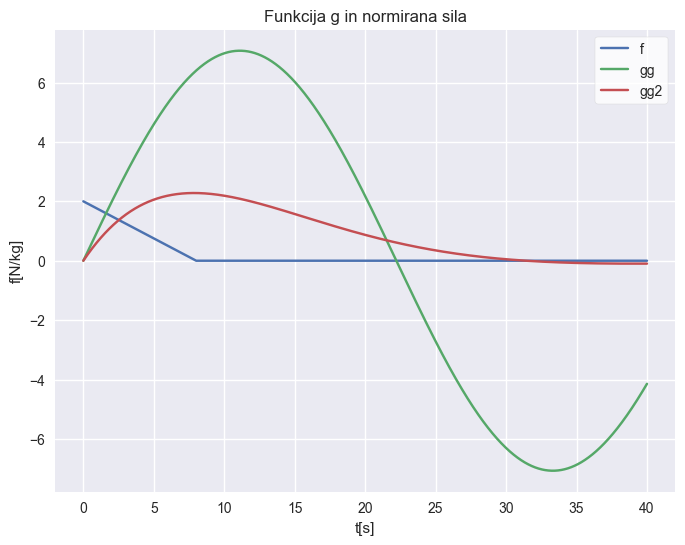

In [23]:
omega0 = np.sqrt(k/m)
omega0D = omega0 * np.sqrt(1 - delta**2)

gg = 1/omega0 * np.sin(omega0 * t)
gg2 = 1/omega0 * np.exp(-delta * omega0 * t) * np.sin(omega0D * t)
F0 = 20000
F = np.zeros_like(t)
F[0:t0_i] = F0 * (1 - t[:t0_i]/t0)
f = F/m


#plot f with size 8,6
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(t, f, label='f')
#new plot with gg and gg2
ax.plot(t, gg, label='gg')
ax.plot(t, gg2, label='gg2')
#set x and y labels
ax.set_xlabel('t[s]')
ax.set_ylabel('f[N/kg]')
#set title
ax.set_title(f'Funkcija g in normirana sila')
#set legend in a white box
ax.legend(loc='upper right', frameon=True, facecolor='white')
#show plot
plt.show()

In [24]:
x = np.convolve(f, gg) * (t[1] - t[0])
xD = np.convolve(f, gg2) * (t[1] - t[0])
x = x[:len(t)]
xD = xD[:len(t)]
#plot x and xD with labels and legend and show the plot


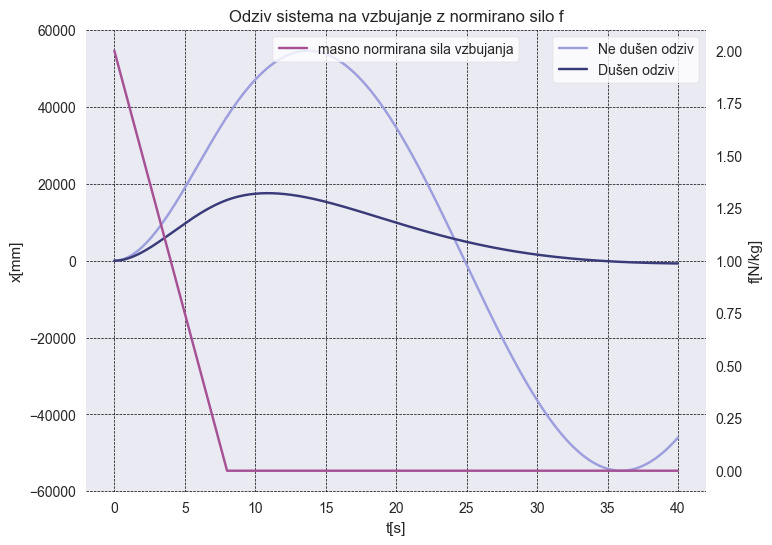

In [25]:
#plot x and xD and f with labels and legend and show the plot
fig, ax = plt.subplots(figsize=(8,6))
ax2 = ax.twinx()

ax.plot(t, 1000*x, label='Ne dušen odziv', color = colors[3])
ax.plot(t, 1000*xD, label='Dušen odziv', color=colors[0])
ax2.plot(t, f, label='masno normirana sila vzbujanja', color=colors[17])
ax.set_xlabel('t[s]')
ax.set_ylabel('x[mm]')
ax2.set_ylabel('f[N/kg]')
ax.set_title('Odziv sistema na vzbujanje z normirano silo f')
ax.legend(loc='upper right', frameon=True, facecolor='white')
ax2.grid(False)
ax.grid(color='black', linestyle='--', linewidth=0.5)
ax2.legend(loc='upper center', frameon=True, facecolor='white')
plt.show()